# Introduction

In the project, our goal is to utilize modeling and algorithms to identify the facial expressions of people, so as to classify and organize them. Facial expression recognition is a very important and necessary link in the development of AI. Social security systems, mobile payment facial recognition systems, car autopilot character recognition systems and robotic service systems, among many other aspects of people’s lives, will use facial expression recognition knowledge and technology. Furthermore, recognizing facial expressions requires humans to have very complex logical thinking and a certain degree of familiarity. The cost of these identifications is considerable. If AI can identify facial expressions more accurately and quickly with specific frameworks and sophisticated algorithms, then computers will be able to record, store and analyze facial images on a large scale at low cost, greatly accelerating social development.

# Related Work

The related works explore multiple different steps into thinking about how well neural networks work and what different concepts they can be helpful in.  One of those fields consist of microexpressions of and how well neural networks can detect emotion from very little facial expression at all.  They used a Dual Temporal Scale Convolutional Neural Network.  Others aimed to test same datasets using different number of epochs to find the test errors with each.  There was also an attempt to use very specific datasets of which would more likely give better results given the fact that you’re talking about similar items in a dataset.  Such as all-female or all male or a group with similar patterns with expressions.  Another aimed to get best method from one dataset and used on different datasets to see if the method was good for more data than just within the one dataset which is what would make it useful.  In another experiment author’s used multiple different methods of data augmentation for classifying dogs and cats such as GANS and neural loss.  This can also apply to how the computer will see some facial expressions as visually similar.  These are all different ways to approach future work in the field to help design 

http://people.idsia.ch/~juergen/ijcai2011.pdf

# Data

The dataset was obtained from a facial expression recognition challenge in kaggle. It consists of two variables: “emotion” and “pixels”. Each "pixels" value was converted to a 48x48x1 numpy array in order to predict "emotion" as an input to a convolutional neural network. 

Variables:
- "emotion" (#s in 0-6)
- "pixels" (48x48x1 3D arrays)


 Data was also normalized and augmented to boost model performance. All data was normalized by dividing pixel values by 255. Augmentation techniques -- flipping, rotating, padding, and re-cropping the images -- were applied to 200 random samples of the training data. 

  Final dataset:
  - **total (36,087)**
  - training (28,909)
  - validation (3,589)
  - testing (3,589) 


dataset:  https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
28909 + 3589 + 3589

36087

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf


# read in data
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/fer2013.csv")

# split data
train = data[data.Usage == 'Training']
val = data[data.Usage == 'PublicTest']
test = data[data.Usage == 'PrivateTest']


# Change Y to one hot encoding  
def convert_emotion_to_one_hot(data):

    y = data["emotion"].values.ravel()    # flatten y
    num_classes = np.unique(y).shape[0]
    num_y = y.shape[0]
    index_offset = np.arange(num_y) * num_classes
    labels_one_hot = np.zeros((num_y, num_classes))
    labels_one_hot.flat[[index_offset + y.ravel()]] = 1

    return labels_one_hot

# Labels for classes
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# create output data
y_train = convert_emotion_to_one_hot(train)
y_val = convert_emotion_to_one_hot(val)
y_test = convert_emotion_to_one_hot(test)

# number of classes in output
y = data["emotion"].values.ravel()    # flatten y
num_classes = np.unique(y).shape[0]

# change X to workable data
def convert_pixels_to_images(data, image_size):

  pixels_values = data.pixels.str.split(" ").tolist()
  pixels_values = pd.DataFrame(pixels_values, dtype=int)

  images = pixels_values.values
  images = images.astype(np.float)
  images = images.reshape(images.shape[0], image_size, image_size, 1)
  images = images.astype('float32')

  return images

# create input data
image_size = 48
X_train = convert_pixels_to_images(train, image_size=image_size)     #images are 48*48
X_val = convert_pixels_to_images(val, image_size=image_size)         #images are 48*48
X_test = convert_pixels_to_images(test, image_size=image_size)       #images are 48*48



"""DATA AUGMENTATION (TRAINING DATA)"""

# select 200 random training images for augmentation
num_rand = 200
np.random.seed(42)
rand = list(np.random.randint(0, len(X_train), num_rand))
images_aug = X_train[rand]

# create augmentation function
def augment(image):
  image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
  image = tf.image.resize_with_crop_or_pad(image, image_size + 6, image_size + 6) # Add 6 pixels of padding
  image = tf.image.random_crop(image,size=[image_size, image_size, 1])             
  image = tf.image.random_flip_left_right(image)
  return image

# augment randomly selected training images images
for image in range(len(images_aug)):
  images_aug[image] = augment(images_aug[image])

# combine augmented data with training data
X_train = np.vstack((X_train, images_aug))
y_train = np.vstack((y_train, y_train[rand]))


"""DATA NORMALIZATION"""

X_train /= 255
X_val /= 255
X_test /= 255


In [0]:
df = pd.concat([data.emotion.value_counts(), data.emotion.value_counts(normalize=True)], axis = 1)
df.columns = ['Number of Observations','Percentage']
df
#0 = "Angry" 1 =  "Disgust" 2 =  "Fear" 3 ="Happy" 4 = "Sad" 5 = "Surprise" 6 = "Neutral"

,Number of Observations,Percentage
3,8989,0.250481
6,6198,0.172709
4,6077,0.169337
2,5121,0.142698
0,4953,0.138017
5,4002,0.111517
1,547,0.015242


Example of Data

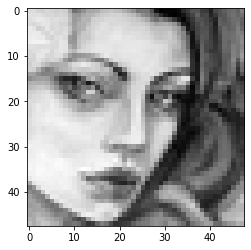

In [0]:
import matplotlib.pyplot as plt

example = X_val[7, :]
example = example.reshape(48, 48)
plt.imshow(example,cmap='gray')
plt.show()

Example of Augmented Data

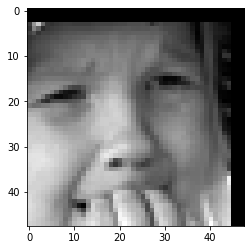

In [0]:
import matplotlib.pyplot as plt

example = images_aug[14, :]
example = example.reshape(48, 48)
plt.imshow(example,cmap='gray')
plt.show()

# Methods

  We based our initial model off of VGG19, and then tuned hyperparameters and customized layers according to our model's performance. 

The convolutional neural network of our choice is defined below, where:
-	Conv2: N-M (N = height and width of filter, M = number of neurons, ReLU activation)
-	Maxpool: P (P = height and width of pooling filter)
-	Dropout: D (D= proportion of dropped neurons)
-	FC: F (F = number of neurons, ReLU activation)

number of layers:
- conv: 5
- FC: 1
- softmax: 1

-------------

**layers** 

--------------
Input

48 x 48 grayscale image

Conv2: 3-64

Maxpool: 2

Dropout: 0.2

Conv2: 3-128

Conv2: 3-128

Maxpool: 2

Dropout: 0.2

Conv2: 3-256

Conv2: 3-256

Maxpool: 2

Dropout: 0.2

FC: 1000

Dropout: 0.3

Soft-max

--------------

Number of parameters: ~ 10 million

-------------

Tuning hyperparameters:
- Paddings: to maintain the same output dimensions as the  input dimensions for all convolutional layers. 
- Dropout: (0.2) regularize the model and prevent overfitting
- loss function: categorical cross-entropy  
- optimization: RMSprop (learning rate of 5e-5)
- activation: ReLU







VGG19 architecture: https://arxiv.org/pdf/1409.1556.pdf#page=3 

In [0]:
#Simplier VGG19 

from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), padding = "same", activation='relu', input_shape = (48,48,1)))
model.add(layers.Conv2D(64, (3, 3), padding = "same",activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), padding = "same",activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding = "same",activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3, 3), padding = "same",activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding = "same",activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=5e-5, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
vgg_model2 = model.fit(X_train,y_train, epochs=20, 
                    validation_data=(X_test, y_test))

Epoch 1/20
904/904 [==============================] - 42s 46ms/step - loss: 1.7625 - accuracy: 0.2827 - val_loss: 1.6395 - val_accuracy: 0.3801
Epoch 2/20
904/904 [==============================] - 41s 45ms/step - loss: 1.5789 - accuracy: 0.3916 - val_loss: 1.4865 - val_accuracy: 0.4257
Epoch 3/20
904/904 [==============================] - 41s 45ms/step - loss: 1.4688 - accuracy: 0.4371 - val_loss: 1.4436 - val_accuracy: 0.4525
Epoch 4/20
904/904 [==============================] - 41s 46ms/step - loss: 1.3921 - accuracy: 0.4714 - val_loss: 1.3702 - val_accuracy: 0.4823
Epoch 5/20
904/904 [==============================] - 41s 45ms/step - loss: 1.3242 - accuracy: 0.4986 - val_loss: 1.3320 - val_accuracy: 0.4923
Epoch 6/20
904/904 [==============================] - 41s 45ms/step - loss: 1.2638 - accuracy: 0.5260 - val_loss: 1.2598 - val_accuracy: 0.5302
Epoch 7/20
904/904 [==============================] - 41s 45ms/step - loss: 1.2148 - accuracy: 0.5423 - val_loss: 1.2482 - val_accuracy:

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0

# Results
Training graphs

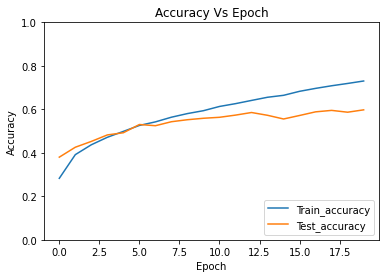

In [0]:
import matplotlib.pyplot as plt
plt.plot(vgg_model2.history['accuracy'], label='Train_accuracy')
plt.plot(vgg_model2.history['val_accuracy'], label = 'Test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy Vs Epoch")
plt.ylim([0, 1])
plt.legend(loc='lower right')

After running the model for 20 epoches,the train accuracy is at about 73%. The Test accuracy is at approximately 60%. We adjusted for issues with overfitting. The model is working correctly.

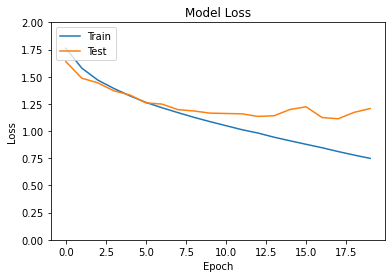

In [0]:
plt.plot(vgg_model2.history['loss'])
plt.plot(vgg_model2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0,2)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Both the Test and the Train data have a loss of about 1.75 at the start. But, by the end of 20 epochs, the train has a loss of .72 while the test’s loss plateaus at about 1.15. The cost function decreases at a higher rate for the train data after epoch 5.

Summary tables:

Overall Accuracy: 59.77%

In [0]:
scores = model.evaluate(X_test, y_test)
(model.metrics_names[1], scores[1]*100)

113/113 [==============================] - 2s 13ms/step - loss: 1.2072 - accuracy: 0.5977


('accuracy', 59.765952825546265)

[Text(69.0, 0.5, 'True label'),
 Text(0.5, 69.0, 'Predicted label'),
 Text(0.5, 1.0, 'Accuracy by Percentage for Emotions')]

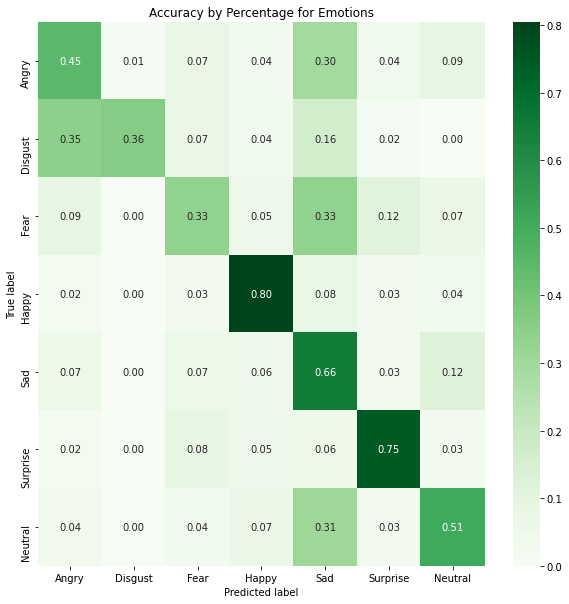

In [0]:
import matplotlib.pyplot as plt

y_pred = model.predict_classes(X_test)
y_true = np.asarray([np.argmax(i) for i in y_test])

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm_percent, annot=True, yticklabels=emotion_labels, xticklabels=emotion_labels, vmax=np.max(cm_percent),fmt=".2f",cmap="Greens")
ax.set(xlabel='Predicted label', ylabel='True label',title ='Accuracy by Percentage for Emotions')

# Discussion
The Overall accuracy when using the validation data was 59.77%. As we can see from the confusion matrix below there were some emotions that were misclassified at higher rates than others. The True positive rate for the emotions is 80% happy,75% surprise,66% sad,45% angry,51% neutral, 36% disgust,and 33% for fear. Angry,neutral,fear,and disgust had lower accuracies than the model did on average. It is interesting that angry was  misclassified as disgust for only 1% of its observations but disgust was misclassified as angry for 35% of its observations. Angry,Fear,and Neutral were all most commonly misclassified as sad.



# Conclusion/ Future Work


Data augmentation and adding drop out layers to the model was needed in order to fix the model's problem of overfitting. The overall accuracy of the model is about 60%.The model could be up or down sampled to adjust for the unbalance in the output data. This would help the model perform better. The model predicts some emotions better than others. So by balencing the data this should solve that problem. We could also see if performance would improve if we added more layers to the model so it could be more like a VGG-19 model.


